In [389]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from pickle import dump, load

# Cargar el dataset

In [390]:
data = pd.read_csv('Data ML - DATA SET.csv')
data = data.sample(frac=1)

In [391]:
data.drop('CÓDIGO - ALUMNO', inplace = True, axis=1)
data.drop('AÑO', inplace = True, axis=1)
data.drop('NACIONALIDAD', inplace = True, axis=1)
data.drop('NACIONALIDAD - PADRE', inplace = True, axis=1)
data.drop('NACIONALIDAD - MADRE', inplace = True, axis=1)
#data.drop('AÑO LECTIVO', inplace = True, axis=1)

In [392]:
data.head(10)

,EDAD,SEXO,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,EDUCACIÓN - PADRE,...,EDUCACIÓN - MADRE,TRABAJO - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,NOTA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
7059,13,Femenino,Urbano,4 - 6 horas,Ninguno,1 - 4,Unifamiliar,Padre,Divorciado,Educación Universitaria,...,Educación Profesional Técnica,Independiente,NO,SECUNDARIA,SEGUNDO AÑO,COMUNICACIÓN,COM0030,A,Ninguna,NO
7636,10,Femenino,Rural,2 - 4 horas,Equipos Deportivos,1 - 4,Unifamiliar,Madre,Casado,Educación Universitaria,...,Educación Profesional Técnica,Artesanías y Manualidades,SI,PRIMARIA,QUINTO GRADO,CIENCIA Y TECNOLOGÍA,COM0019,B,Ninguna,NO
1517,8,Masculino,Urbano,4 - 6 horas,Equipos Deportivos,1 - 4,Unifamiliar,Apoderado,Soltero,Educación Universitaria,...,Educación Profesional Técnica,Estética Personal,SI,PRIMARIA,TERCER GRADO,PERSONAL SOCIAL,COM0004,A,Ninguna,NO
5767,7,Femenino,Urbano,2 - 4 horas,Ninguno,1 - 4,Quinta,Madre,Conviviente,Educación Profesional Técnica,...,Educacion Secundaria,Independiente,SI,PRIMARIA,SEGUNDO GRADO,PERSONAL SOCIAL,COM0001,A,Disgrafía,SI
8121,9,Femenino,Urbano,2 - 4 horas,Ninguno,1 - 4,Quinta,Madre,Casado,Educación Profesional Técnica,...,Educacion Secundaria,Estética Personal,SI,PRIMARIA,CUARTO GRADO,CIENCIA Y TECNOLOGÍA,COM0019,B,Ninguna,NO
4869,15,Masculino,Urbano,4 - 6 horas,Equipos Deportivos,5 - 8,Edificio Multifamiliar,Madre,Casado,Educación Profesional Técnica,...,Educación Profesional Técnica,Textil y Confección,SI,SECUNDARIA,CUARTO AÑO,CIENCIA Y TECNOLOGÍA,COM0019,A,Ninguna,NO
3653,14,Femenino,Urbano,4 - 6 horas,Ninguno,5 - 8,Edificio Multifamiliar,Madre,Conviviente,Educación Universitaria,...,Educación Profesional Técnica,Estética Personal,SI,SECUNDARIA,TERCER AÑO,COMUNICACIÓN,COM0011,AD,Ninguna,NO
3587,11,Femenino,Urbano,4 - 6 horas,Ninguno,5 - 8,Edificio Multifamiliar,Madre,Conviviente,Educación Universitaria,...,Educación Profesional Técnica,Estética Personal,SI,PRIMARIA,SEXTO GRADO,CASTELLANO COMO SEGUNDA LENGUA,COM0028,A,Ninguna,NO
7858,12,Masculino,Urbano,8 - más horas,Ninguno,1 - 4,Unifamiliar,Personal Autorizado,Casado,Educación Universitaria,...,Educación Universitaria,Industrias Alimentarias,SI,SECUNDARIA,PRIMER AÑO,MATEMÁTICA,COM0040,B,Discapacidad Intelectual,SI
5884,11,Femenino,Urbano,1 - 2 horas,Equipos Deportivos,1 - 4,Quinta,Madre,Conviviente,Educación Universitaria,...,Educacion Secundaria,Independiente,SI,PRIMARIA,SEXTO GRADO,EDUCACIÓN FÍSICA,COM0008,A,Ninguna,NO


In [393]:
A = data[data['NOTA'] == 'A']
A = A.sample(frac = 0.4)
C = data[data['NOTA'] == 'C']
A

,EDAD,SEXO,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,EDUCACIÓN - PADRE,...,EDUCACIÓN - MADRE,TRABAJO - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,NOTA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
2891,10,Masculino,Urbano,6 - 8 horas,Ninguno,9 - 12,Conjunto Residencial,Madre,Divorciado,Educación Profesional Técnica,...,Educación Universitaria,Docencia,SI,PRIMARIA,QUINTO GRADO,MATEMÁTICA,COM0017,A,Ninguna,NO
2650,14,Femenino,Urbano,4 - 6 horas,Ninguno,1 - 4,Unifamiliar,Madre,Casado,Educación Universitaria,...,Educación Universitaria,Medicina,SI,SECUNDARIA,TERCER AÑO,EDUCACIÓN FÍSICA,COM0007,A,Ninguna,NO
2541,10,Femenino,Urbano,4 - 6 horas,Ninguno,1 - 4,Unifamiliar,Madre,Casado,Educación Universitaria,...,Educación Universitaria,Medicina,SI,PRIMARIA,QUINTO GRADO,ARTE Y CULTURA,COM0009,A,Ninguna,NO
2485,13,Masculino,Urbano,2 - 4 horas,Equipos Deportivos,5 - 8,Unifamiliar,Apoderado,Soltero,Educación Universitaria,...,Educación Profesional Técnica,Estética Personal,SI,SECUNDARIA,SEGUNDO AÑO,COMUNICACIÓN,COM0031,A,Trastorno por Déficit de Atención e Hiperactiv...,NO
1458,11,Masculino,Urbano,4 - 6 horas,Equipos Académicos,9 - 12,Edificio Multifamiliar,Madre,Casado,Educación Universitaria,...,Educación Universitaria,Docencia,SI,PRIMARIA,SEXTO GRADO,CASTELLANO COMO SEGUNDA LENGUA,COM0028,A,Ninguna,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,8,Masculino,Urbano,4 - 6 horas,Equipos Deportivos,1 - 4,Unifamiliar,Apoderado,Soltero,Educación Universitaria,...,Educación Profesional Técnica,Estética Personal,SI,PRIMARIA,TERCER GRADO,PERSONAL SOCIAL,COM0001,A,Ninguna,NO
1057,9,Masculino,Urbano,4 - 6 horas,Ninguno,9 - 12,Edificio Multifamiliar,Familiar Cercano,Divorciado,Educacion Secundaria,...,Educación Universitaria,Industrias Alimentarias,SI,PRIMARIA,CUARTO GRADO,MATEMÁTICA,COM0017,A,Ninguna,NO
6347,10,Femenino,Urbano,2 - 4 horas,Equipos Deportivos,9 - 12,Edificio Multifamiliar,Familiar Cercano,Casado,Educación Universitaria,...,Educación Profesional Técnica,Textil y Confección,SI,PRIMARIA,QUINTO GRADO,CASTELLANO COMO SEGUNDA LENGUA,COM0027,A,Ninguna,NO
27,7,Masculino,Urbano,4 - 6 horas,Ninguno,1 - 4,Unifamiliar,Madre,Casado,Educación Universitaria,...,Educación Universitaria,Administración y Comercio,SI,PRIMARIA,SEGUNDO GRADO,PERSONAL SOCIAL,COM0002,A,Ninguna,NO


In [394]:
data.drop(data[data['NOTA'] == 'A'].index, inplace = True)
data

,EDAD,SEXO,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,EDUCACIÓN - PADRE,...,EDUCACIÓN - MADRE,TRABAJO - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,NOTA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
7636,10,Femenino,Rural,2 - 4 horas,Equipos Deportivos,1 - 4,Unifamiliar,Madre,Casado,Educación Universitaria,...,Educación Profesional Técnica,Artesanías y Manualidades,SI,PRIMARIA,QUINTO GRADO,CIENCIA Y TECNOLOGÍA,COM0019,B,Ninguna,NO
8121,9,Femenino,Urbano,2 - 4 horas,Ninguno,1 - 4,Quinta,Madre,Casado,Educación Profesional Técnica,...,Educacion Secundaria,Estética Personal,SI,PRIMARIA,CUARTO GRADO,CIENCIA Y TECNOLOGÍA,COM0019,B,Ninguna,NO
3653,14,Femenino,Urbano,4 - 6 horas,Ninguno,5 - 8,Edificio Multifamiliar,Madre,Conviviente,Educación Universitaria,...,Educación Profesional Técnica,Estética Personal,SI,SECUNDARIA,TERCER AÑO,COMUNICACIÓN,COM0011,AD,Ninguna,NO
7858,12,Masculino,Urbano,8 - más horas,Ninguno,1 - 4,Unifamiliar,Personal Autorizado,Casado,Educación Universitaria,...,Educación Universitaria,Industrias Alimentarias,SI,SECUNDARIA,PRIMER AÑO,MATEMÁTICA,COM0040,B,Discapacidad Intelectual,SI
5558,11,Femenino,Urbano,4 - 6 horas,Ninguno,1 - 4,Quinta,Madre,Casado,Educación Profesional Técnica,...,Educacion Secundaria,Independiente,SI,PRIMARIA,SEXTO GRADO,ARTE Y CULTURA,COM0010,AD,Ninguna,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,11,Masculino,Urbano,2 - 4 horas,Ninguno,9 - 12,Edificio Multifamiliar,Familiar Cercano,Divorciado,Educacion Secundaria,...,Educación Universitaria,Industrias Alimentarias,SI,PRIMARIA,SEXTO GRADO,EDUCACIÓN FÍSICA,COM0008,AD,Ninguna,NO
10088,14,Masculino,Urbano,2 - 4 horas,Ninguno,5 - 8,Quinta,Madre,Conviviente,Educación Profesional Técnica,...,Educación Universitaria,Electricidad y Electrónica,SI,SECUNDARIA,TERCER AÑO,ARTE Y CULTURA,COM0009,B,Ninguna,NO
8633,10,Masculino,Urbano,1 - 2 horas,Equipos Deportivos,1 - 4,Quinta,Madre,Conviviente,Educación Universitaria,...,Educación Profesional Técnica,Independiente,SI,PRIMARIA,QUINTO GRADO,MATEMÁTICA,COM0017,C,Ninguna,NO
3823,14,Femenino,Urbano,4 - 6 horas,Ninguno,5 - 8,Conjunto Residencial,Familiar Cercano,Viudo,Educación Universitaria,...,Educación Profesional Técnica,Actividades Agrarias,NO,SECUNDARIA,TERCER AÑO,ARTE Y CULTURA,COM0009,AD,Ninguna,NO


In [395]:
frames = [data, A, C, C, C]
data = pd.concat(frames)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 7636 to 8633
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   EDAD                            6890 non-null   int64 
 1   SEXO                            6890 non-null   object
 2   POBLACIÓN                       6890 non-null   object
 3   TIEMPO DE ESTUDIO               6890 non-null   object
 4   ACTIVIDADES EXTRACADÉMICAS      6890 non-null   object
 5   TAMAÑO DE LA FAMILIA            6890 non-null   object
 6   TIPO DE VIVIENDA                6890 non-null   object
 7   ENCARGADO DEL MENOR             6890 non-null   object
 8   ESTADO CIVIL - PADRE            6890 non-null   object
 9   EDUCACIÓN - PADRE               6890 non-null   object
 10  TRABAJO - PADRE                 6890 non-null   object
 11  VIVE CON EL ESTUDIANTE - PADRE  6890 non-null   object
 12  ESTADO CIVIL - MADRE            6890 non-null

# EDA

In [397]:
data['NOTA'].value_counts()

A     2573
B     2444
AD    1101
C      772
Name: NOTA, dtype: int64

In [398]:
data['TIEMPO DE ESTUDIO'].value_counts()

2 - 4 horas      2832
4 - 6 horas      2259
1 - 2 horas       917
6 - 8 horas       534
8 - más horas     348
Name: TIEMPO DE ESTUDIO, dtype: int64

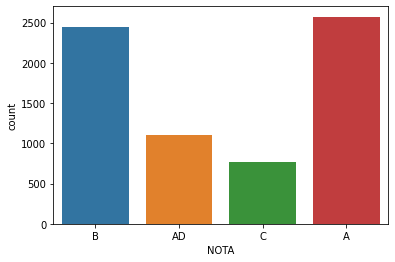

In [399]:
sns.countplot(x=data['NOTA'])

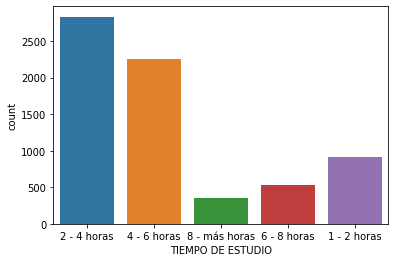

In [400]:
sns.countplot(x=data['TIEMPO DE ESTUDIO'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

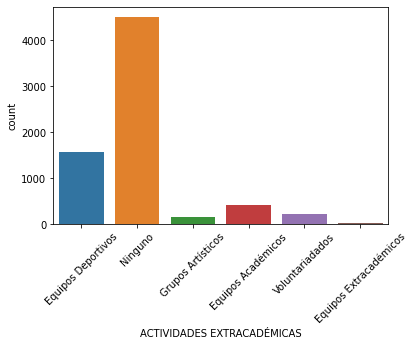

In [401]:
sns.countplot(x=data['ACTIVIDADES EXTRACADÉMICAS'])
plt.xticks(rotation=45)

# Preprocesamiento de datos

## Datos categoricos a datos numericos

In [402]:
data['SEXO'].replace(['Masculino', 'Femenino'], [0,1], inplace=True)
#data['NACIONALIDAD'].replace(['PERÚ', 'Extranjero', 'PERU'], [1,0,1], inplace=True)
data['POBLACIÓN'].replace(['Urbano', 'Rural'], [0,1], inplace=True)
data['TIEMPO DE ESTUDIO'].replace(['1 - 2 horas', '2 - 4 horas', '4 - 6 horas', '6 - 8 horas', '8 - más horas', 'Ninguno'], [1,2,3,4,5,0], inplace=True)
data['ACTIVIDADES EXTRACADÉMICAS'].replace(['Grupos Artísticos','Equipos Deportivos','Equipos Académicos','Equipos Extracadémicos','Voluntariadados','Ninguno'], [1,2,3,4,5,0], inplace=True)
data['TAMAÑO DE LA FAMILIA'].replace(['1 - 4','5 - 8','9 - 12','13 - más'], [1,2,3,4], inplace=True)
data['TIPO DE VIVIENDA'].replace(['Unifamiliar','Edificio Multifamiliar','Conjunto Residencial','Quinta','Otro'], [1,2,3,4,0], inplace=True)
data['ENCARGADO DEL MENOR'].replace(['Padre','Madre','Apoderado','Familiar Cercano','Personal Autorizado','Otro'], [1,2,3,4,5,0], inplace=True)
data['ESTADO CIVIL - PADRE'].replace(['Soltero','Casado','Divorciado','Viudo','Conviviente'], [1,2,3,4,5], inplace=True)
data['ESTADO CIVIL - MADRE'].replace(['Soltero','Casado','Divorciado','Viudo','Conviviente'], [1,2,3,4,5], inplace=True)
data['EDUCACIÓN - PADRE'].replace(['Edcacion Inicial','Educacion Primaria','Educacion Secundaria',
                                   'Educación Profesional Técnica','Grado Superior','Educación Universitaria','Ninguno'], [1,2,3,4,5,6,0], inplace=True)
data['EDUCACIÓN - MADRE'].replace(['Edcacion Inicial','Educacion Primaria','Educacion Secundaria',
                                   'Educación Profesional Técnica','Grado Superior','Educación Universitaria','Ninguno'], [1,2,3,4,5,6,0], inplace=True)
data['TRABAJO - PADRE'].replace(['Administración y Comercio','Actividades Agrarias','Actividades Marítimo-Pesqueras','Artes Gráficas',
                                 'Artesanías y Manualidades','Computación e Informática','Comunicación, Imagen y Sonido','Construcción','Cuero y Calzado',
                                 'Electricidad y Electrónica','Estética Personal','Hostelería y Turismo','Industrias Alimentarias','Mecánica y Metales',
                                 'Mecánica y Motores','Minería','Química','Textil y Confección','Independiente','Docencia','Medicina'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)
data['TRABAJO - MADRE'].replace(['Administración y Comercio','Actividades Agrarias','Actividades Marítimo-Pesqueras','Artes Gráficas',
                                 'Artesanías y Manualidades','Computación e Informática','Comunicación, Imagen y Sonido','Construcción','Cuero y Calzado',
                                 'Electricidad y Electrónica','Estética Personal','Hostelería y Turismo','Industrias Alimentarias','Mecánica y Metales',
                                 'Mecánica y Motores','Minería','Química','Textil y Confección','Independiente','Docencia','Medicina'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)
#data['NACIONALIDAD - PADRE'].replace(['PERÚ', 'Extranjero'], [1,0], inplace=True)
#data['NACIONALIDAD - MADRE'].replace(['PERÚ', 'Extranjero'], [1,0], inplace=True)
data['VIVE CON EL ESTUDIANTE - PADRE'].replace(['SI', 'NO'], [1,2], inplace=True)
data['VIVE CON EL ESTUDIANTE - MADRE'].replace(['SI', 'NO'], [1,2], inplace=True)
data['ENFERMEDADES'].replace(['Dislexia','Disgrafía','Discalculia','Discapacidad de la Memoria y el Procesamiento Auditivo','Trastorno por Déficit de Atención e Hiperactividad (TDHA)'
                              ,'Trastorno del Espectro Autista/Trastorno Generalizado del Desarrollo','Discapacidad Intelectual','Otros','Ninguna'], [1,2,3,4,5,6,7,8,0], inplace=True)
data['TIENE NECESIDADES ESPECIALES'].replace(['SI', 'NO'], [1,0], inplace=True)
data['GRADO'].replace(['PRIMARIA', 'SECUNDARIA'], [1,2], inplace=True)
data['AÑO LECTIVO'].replace(['PRIMER GRADO', 'SEGUNDO GRADO', 'TERCER GRADO', 'CUARTO GRADO', 'QUINTO GRADO', 'SEXTO GRADO',
                             'PRIMER AÑO', 'SEGUNDO AÑO', 'TERCER AÑO','CUARTO AÑO','QUINTO AÑO'], [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
data['ÁREA'].replace(['CIENCIA Y TECNOLOGÍA', 'CASTELLANO COMO SEGUNDA LENGUA', 'INGLÉS',
                             'MATEMÁTICA', 'COMUNICACIÓN', 'ARTE Y CULTURA', 'EDUCACIÓN FÍSICA',
                             'EDUCACIÓN RELIGIOSA', 'PERSONAL SOCIAL', 'CIENCIAS SOCIALES',
                             'DESARROLLO PERSONAL, CIUDADANÍA Y CÍVICA',
                             'EDUCACIÓN PARA EL TRABAJO'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

In [403]:
[6, 'Masculino','Urbano', '6 - 8 horas', 'Ninguno','1 - 4','Unifamiliar','Madre','Casado','Educación Universitaria','Mecánica y Metales','SI','Casado','Educación Universitaria','Administración y Comercio',	'SI','PRIMARIA,''PRIMER GRADO',	'PERSONAL SOCIAL','COM0001','Ninguna','NO']

[6,
 'Masculino',
 'Urbano',
 '6 - 8 horas',
 'Ninguno',
 '1 - 4',
 'Unifamiliar',
 'Madre',
 'Casado',
 'Educación Universitaria',
 'Mecánica y Metales',
 'SI',
 'Casado',
 'Educación Universitaria',
 'Administración y Comercio',
 'SI',
 'PRIMARIA,PRIMER GRADO',
 'PERSONAL SOCIAL',
 'COM0001',
 'Ninguna',
 'NO']

In [404]:
codes = np.arange(1, 42, 1)
new = []
for i in range(1, 42):
    if i < 10:
        new.append('COM000'+str(i))
        #print('COM000'+str(i))
    else: new.append('COM00'+str(i))
data['COMPETENCIA'].replace(new, codes, inplace=True)

In [405]:
data['NOTA'].replace(['AD', 'A', 'B', 'C'], [4,3,2,1], inplace=True)

In [406]:
data['NOTA'].unique()

array([2, 4, 1, 3])

In [407]:
data.head()

,EDAD,SEXO,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,EDUCACIÓN - PADRE,...,EDUCACIÓN - MADRE,TRABAJO - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,NOTA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
7636,10,1,1,2,2,1,1,2,2,6,...,4,5,1,1,5,1,19,2,0,0
8121,9,1,0,2,0,1,4,2,2,4,...,3,11,1,1,4,1,19,2,0,0
3653,14,1,0,3,0,2,2,2,5,6,...,4,11,1,2,9,5,11,4,0,0
7858,12,0,0,5,0,1,1,5,2,6,...,6,13,1,2,7,4,40,2,7,1
5558,11,1,0,3,0,1,4,2,2,4,...,3,19,1,1,6,6,10,4,0,0


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 7636 to 8633
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   EDAD                            6890 non-null   int64
 1   SEXO                            6890 non-null   int64
 2   POBLACIÓN                       6890 non-null   int64
 3   TIEMPO DE ESTUDIO               6890 non-null   int64
 4   ACTIVIDADES EXTRACADÉMICAS      6890 non-null   int64
 5   TAMAÑO DE LA FAMILIA            6890 non-null   int64
 6   TIPO DE VIVIENDA                6890 non-null   int64
 7   ENCARGADO DEL MENOR             6890 non-null   int64
 8   ESTADO CIVIL - PADRE            6890 non-null   int64
 9   EDUCACIÓN - PADRE               6890 non-null   int64
 10  TRABAJO - PADRE                 6890 non-null   int64
 11  VIVE CON EL ESTUDIANTE - PADRE  6890 non-null   int64
 12  ESTADO CIVIL - MADRE            6890 non-null   int64
 13  

## Set de Entrenamiento y Validación

In [409]:
X = data.loc[:,data.columns != 'NOTA']
Y = data.loc[:,'NOTA']

In [410]:
Y

7636    2
8121    2
3653    4
7858    2
5558    4
       ..
7101    1
8513    1
9495    1
7057    1
8633    1
Name: NOTA, Length: 6890, dtype: int64

In [411]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y,4)

In [412]:
Y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [413]:
X.head(5)

,EDAD,SEXO,POBLACIÓN,TIEMPO DE ESTUDIO,ACTIVIDADES EXTRACADÉMICAS,TAMAÑO DE LA FAMILIA,TIPO DE VIVIENDA,ENCARGADO DEL MENOR,ESTADO CIVIL - PADRE,EDUCACIÓN - PADRE,...,ESTADO CIVIL - MADRE,EDUCACIÓN - MADRE,TRABAJO - MADRE,VIVE CON EL ESTUDIANTE - MADRE,GRADO,AÑO LECTIVO,ÁREA,COMPETENCIA,ENFERMEDADES,TIENE NECESIDADES ESPECIALES
7636,10,1,1,2,2,1,1,2,2,6,...,2,4,5,1,1,5,1,19,0,0
8121,9,1,0,2,0,1,4,2,2,4,...,2,3,11,1,1,4,1,19,0,0
3653,14,1,0,3,0,2,2,2,5,6,...,5,4,11,1,2,9,5,11,0,0
7858,12,0,0,5,0,1,1,5,2,6,...,2,6,13,1,2,7,4,40,7,1
5558,11,1,0,3,0,1,4,2,2,4,...,2,3,19,1,1,6,6,10,0,0


In [414]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(X,Y,test_size=0.20) # 80-20

## Normalizacion 

In [415]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # normalizacion de la data

trainX_scaled = scaler.fit_transform(x_train)
testX_scaled = scaler.transform(x_test)

In [416]:
#trainX_scaled[0]

# Entrenamiento del modelo

In [417]:
x_train.shape

(5512, 22)

In [418]:
trainX_scaled.shape

(5512, 22)

In [431]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


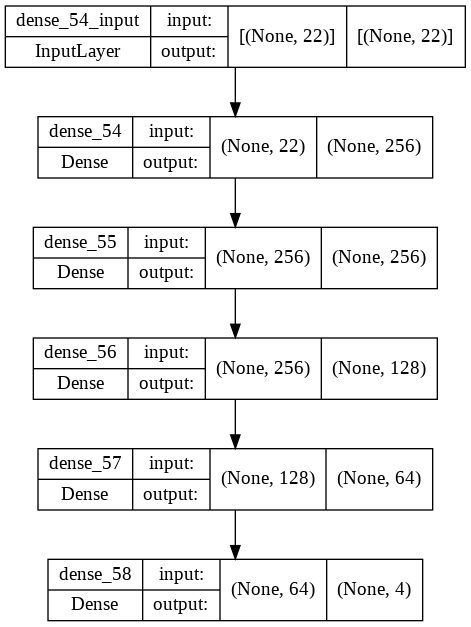

In [420]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [433]:
print("Comenzando entrenamiento...")
historial = model.fit(trainX_scaled, y_train, epochs=100, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/100
173/173 [==============================] - 2s 9ms/step - loss: 0.4023 - accuracy: 0.8066 - precision: 0.6253 - recall: 0.5653
Epoch 2/100
173/173 [==============================] - 1s 4ms/step - loss: 0.3702 - accuracy: 0.8173 - precision: 0.6478 - recall: 0.5900
Epoch 3/100
173/173 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8212 - precision: 0.6533 - recall: 0.6069
Epoch 4/100
173/173 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8279 - precision: 0.6683 - recall: 0.6185
Epoch 5/100
173/173 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8280 - precision: 0.6708 - recall: 0.6125
Epoch 6/100
173/173 [==============================] - 1s 3ms/step - loss: 0.3328 - accuracy: 0.8312 - precision: 0.6782 - recall: 0.6183
Epoch 7/100
173/173 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8338 - precision: 0.6798 - recall: 0.6337
Epoch 

# Validacion

In [434]:
model.evaluate(testX_scaled, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8654 - precision: 0.7331 - recall: 0.7257


[0.4511233866214752, 0.8653846383094788, 0.733137845993042, 0.7256894111633301]

In [435]:
model.predict(x_test[1:2])

array([[0.0000000e+00, 1.7634762e-31, 1.0000000e+00, 6.7853419e-37]],
      dtype=float32)

In [436]:
print(y_test)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


1378


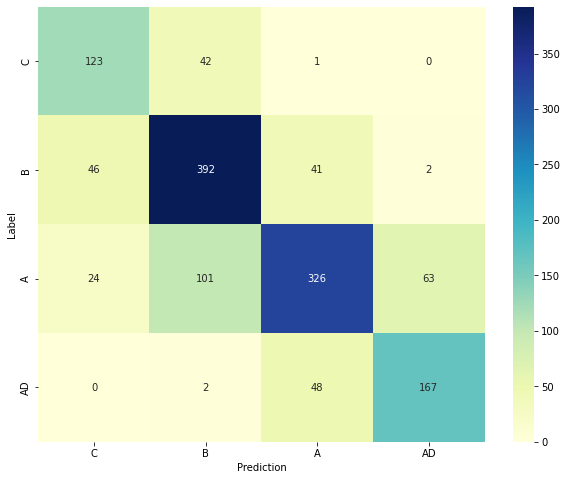

In [437]:
res = model.predict(testX_scaled)

preds = np.zeros(res.shape[0])
true = np.zeros(res.shape[0])

for i in range(len(preds)):
    index_max = np.argmax(res[i])
    preds[i] = index_max

    index_max_test = np.argmax(y_test[i])
    true[i] = index_max_test
    
print(len(preds))

confusion_mtx = tf.math.confusion_matrix(true, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=['C', 'B', 'A', 'AD'],
            yticklabels=['C', 'B', 'A', 'AD'],
            annot=True, fmt='g',
            cmap="YlGnBu")
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [426]:
X.columns

Index(['EDAD', 'SEXO', 'POBLACIÓN', 'TIEMPO DE ESTUDIO',
       'ACTIVIDADES EXTRACADÉMICAS', 'TAMAÑO DE LA FAMILIA',
       'TIPO DE VIVIENDA', 'ENCARGADO DEL MENOR', 'ESTADO CIVIL - PADRE',
       'EDUCACIÓN - PADRE', 'TRABAJO - PADRE',
       'VIVE CON EL ESTUDIANTE - PADRE', 'ESTADO CIVIL - MADRE',
       'EDUCACIÓN - MADRE', 'TRABAJO - MADRE',
       'VIVE CON EL ESTUDIANTE - MADRE', 'GRADO', 'AÑO LECTIVO', 'ÁREA',
       'COMPETENCIA', 'ENFERMEDADES', 'TIENE NECESIDADES ESPECIALES'],
      dtype='object')

In [427]:
print(X.columns)

Index(['EDAD', 'SEXO', 'POBLACIÓN', 'TIEMPO DE ESTUDIO',
       'ACTIVIDADES EXTRACADÉMICAS', 'TAMAÑO DE LA FAMILIA',
       'TIPO DE VIVIENDA', 'ENCARGADO DEL MENOR', 'ESTADO CIVIL - PADRE',
       'EDUCACIÓN - PADRE', 'TRABAJO - PADRE',
       'VIVE CON EL ESTUDIANTE - PADRE', 'ESTADO CIVIL - MADRE',
       'EDUCACIÓN - MADRE', 'TRABAJO - MADRE',
       'VIVE CON EL ESTUDIANTE - MADRE', 'GRADO', 'AÑO LECTIVO', 'ÁREA',
       'COMPETENCIA', 'ENFERMEDADES', 'TIENE NECESIDADES ESPECIALES'],
      dtype='object')


# Expotar el modelo

In [438]:
dump(scaler, open('scaler.pkl', 'wb'))

In [439]:
apipred = [6, 'Masculino','Urbano', '6 - 8 horas', 'Ninguno','1 - 4','Unifamiliar','Madre','Casado','Educación Universitaria','Mecánica y Metales','SI','Casado',
           'Educación Universitaria','Administración y Comercio','SI','PRIMARIA,''PRIMER GRADO','PERSONAL SOCIAL','COM0001','Ninguna','NO']
 
apidict = {'EDAD': 6, 
           'SEXO': 'Masculino', 
           'POBLACIÓN' : 'Urbano', 
           'TIEMPO DE ESTUDIO': '6 - 8 horas',
           'ACTIVIDADES EXTRACADÉMICAS': 'Ninguno', 
           'TAMAÑO DE LA FAMILIA': '1 - 4',
           'TIPO DE VIVIENDA': 'Unifamiliar', 
           'ENCARGADO DEL MENOR': 'Madre', 
           'ESTADO CIVIL - PADRE': 'Casado',
           'EDUCACIÓN - PADRE': 'Educacion Universitaria', 
           'TRABAJO - PADRE': 'Mecánica y Metales',
           'VIVE CON EL ESTUDIANTE - PADRE': 'SI', 
           'ESTADO CIVIL - MADRE': 'Casado',
           'EDUCACIÓN - MADRE': 'Educación Universitaria', 
           'TRABAJO - MADRE': 'Administración y Comercio',
           'VIVE CON EL ESTUDIANTE - MADRE': 'SI', 
           'GRADO': 'PRIMARIA',
           'AÑO LECTIVO': 'PRIMER GRADO', 
           'ÁREA': 'PERSONAL SOCIAL',
           'COMPETENCIA': 'COM0001', 
           'ENFERMEDADES': 'Ninguna', 
           'TIENE NECESIDADES ESPECIALES': ['NO']}

apidf = pd.DataFrame(data=apidict)
std = scaler.transform(apidf)

ValueError: ignored

In [429]:
#model.predict([])

In [430]:
#Exportar el modelo en formato h5
#model.save('grades.h5')